#ATSC 405 Day 9 Assignment
## Bryan Jansens

-------

##Objective: Adapt the rootfind notebook to solve equation (8) from the notes for the saturation vapour pressure $e_{sat}$ and compare with Thompkins (2.13) or (2.15) for 10 temperatures between 0-20$^{\circ}$ C.

The equation to solve is$\\[2mm]$

$$l_v=\left(\phi_v^*-\phi_l\right)T,$$

where $l_v$ is the (temperature-dependent) enthalpy of evaporation, $\phi_v^*$ is the entropy/mass of the saturated vapor phase of water, $\phi_l$ is the entropy/mass of the liquid phase, and $T$ is the temperature. Expressions for $l_v$, $\phi_v^*$, and $\phi_l$ are developed in the notes. Namely, I can replace $l_v$ with expression (13),$\\[2mm]$

$$l_v=\left(c_{pv}-c_l\right)\left(T-T_0\right)+l_0,\\[2mm]$$

where $l_0=2.501\times10^6 \ \mathrm{J \ kg}^{-1}$ is the value of $l_v$ at temperature $T_0=273 \ \mathrm{K}$, $c_{pv}=1870 \ \mathrm{J \ kg}^{-1} \ \mathrm{K}^{-1}$, and $c_{l}=4187 \ \mathrm{J \ kg}^{-1} \ \mathrm{K}^{-1}$. 

I can replace $\phi_l$ with expression (11),$\\[2mm]$

$$\phi_l=c_l\ln\left(\frac{T}{T_p}\right),\\[2mm]$$

where $T_p=273.15 \ \mathrm{K}$ is the temperature at the triple point of water.

Finally, I can replace $\phi_v^*$ with expression (10),$\\[2mm]$

$$\phi_v^*=c_{pv}\ln\left(\frac{T}{T_p}\right)-R_v\ln\left(\frac{e_{sat}}{e_{s0}}\right)+\phi_0,\\[2mm]$$

where $R_v=461.5 \ \mathrm{J \ kg}^{-1} \ \mathrm{K}^{-1}$ is the specific gas constant for water vapour, $e_{s0}=6.11 \ \mathrm{hPa}$, $\phi_0=l_0/T_p$, and $e_{sat}$ is the saturation vapour pressure that I would like to solve for.

Then, as per the notes, I can insert these last three expressions into the first expression and solve for $e_{sat}$ for different values of $T$. The exact expression for $e_{sat}$ is$\\[2mm]$

$$\begin{aligned}
&\frac{l_v}{T}+\phi_l=\phi_v^*\\[2mm]
& \implies \ e_{sat}=e_{s0}\exp\left[-\frac{\frac{l_v}{T}+\phi_l-c_{pv}\ln\left(\frac{T}{T_p}\right)-\phi_0}{R_v}\right].
\end{aligned}$$

In [15]:
#Imports

import numpy as np
import a405thermo.rootfinder as rf
from importlib import reload
reload(rf)

<module 'a405thermo.rootfinder' from 'C:\\Users\\Bryan\\repos\\A405\\a405thermo\\rootfinder.py'>

In [16]:
#Constants

c_pv = 1870.      #J kg^-1 K^-1
c_l = 4187.       #J kg^-1 K^-1
T_0 = 273.        #K
l_0 = 2.501e6     #J kg^-1
T_p = 273.15      #K
R_v = 461.5       #J kg^-1 K^-1
e_s0 = 6.11       #hPa
phi_0 = l_0/T_p

In [23]:
#Get a list of temperatures

temps = np.linspace(273,310,40)

In [24]:
def find_esat_target(temp):
    esat_target = e_s0*np.exp(((2.5e6)/R_v)*((1./T_0)-(1./temp)))
    return esat_target

In [25]:
#Define the root-finding function for e_sat

def esat_zero(esat_target, temp):
    """Function we want to find the root of
       input: esat_guess (hPa), esat_target (hPa), temperature (K)
       output: difference between guess and target -- should be zero when x is a root
    """   
    l_v = (c_pv - c_l)*(temp - T_0) + l_0
    phi_l = c_l*np.log(temp/T_p)
    esat_guess = c_pv*np.log(temp/T_p) - R_v*np.log(esat_target/e_s0) + phi_0 - c_l*np.log(temp/T_p) - l_v/temp
    #esat_guess = e_s0*np.exp(-((l_v/temp) + phi_l - c_pv*np.log(temp/T_p) - phi_0)/R_v)
    return esat_guess

In [26]:
#Define a function that finds the roots using brentq

def find_esat(temp):
    """
       input: theta (K), press (Pa)
       output: e_sat (hPa) found by rootfinder
    """     
    #
    #  use theta as guess for bracket and pass theta,press to theta_zero
    #
    esat_target = find_esat_target(temp)
    brackets = rf.find_interval(esat_zero, esat_target, temp)
    e_sat = rf.fzero(esat_zero, brackets, temp)
    return e_sat

In [31]:
reload(rf)
#esat_target = 611.2*np.exp((17.67*(temp - 273))/((temp - 273) + 243.5))
#esat_target = e_s0*np.exp(((2.5e6)/R_v)*((1/T_0)-(1/temp)))
esat_list = []
for temp_val in temps: 
    esat_root = find_esat(temp_val)
    esat_list.append(esat_root)

[6.06044665113673, 6.49153672680573, 6.949576800541577, 7.4360043820836275, 7.95231917532473, 8.500085039556287, 9.080931981712517, 9.69655817899797, 10.348732031243308, 11.039294242294071, 11.770159929699195, 12.543320761927944, 13.360847122302603, 14.224890298802586, 15.137684698851299, 16.101550088166945, 17.118893852718827, 18.192213282796022, 19.32409787816248, 20.51723167323821, 21.774395581210086, 23.098469755952223, 24.492435970592105, 25.959380011543413, 27.50249408678374, 29.125079247138295, 30.830547819289666, 32.6224258492344, 34.504355554841645, 36.4800977861884, 38.55353449229172, 40.728671192853525, 43.009639453608855, 45.40069936384806, 47.90624201466797, 50.53079197648971, 53.2790097743729, 56.1556943596239, 59.16578557620711, 62.31436662044125]


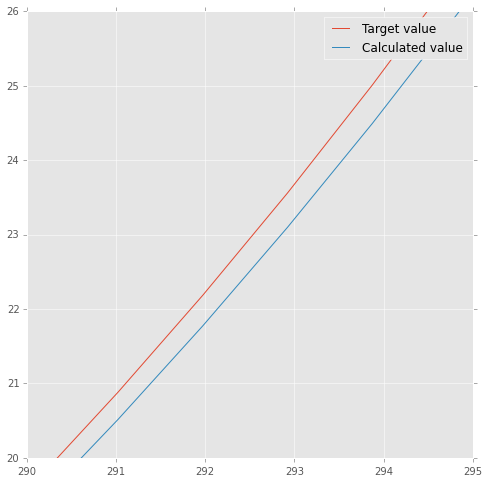

In [30]:
%matplotlib inline
plt.style.use('ggplot')
plt.close('all')
fig,ax = plt.subplots(1,1,figsize=(8,8))
es_targets = find_esat_target(temps)
ax.plot(temps,es_targets,label='Target value')
ax.plot(temps,esat_list,label='Calculated value')
ax.set(xlim=(290,295),ylim=(20,26))
ax.legend()
plt.show()